In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import json


In [68]:
performanceMetrics = ['largest-contentful-paint', 'first-contentful-paint', 'interactive', 'total-blocking-time', 'speed-index']

In [69]:
audits = pd.read_json('audits.json')
performanceMetricsDict = {}
for metric in performanceMetrics:
    performanceMetricsDict.update({metric: json.load(open(f'{metric}.json', 'r'))})
performanceMetricsDict

{'largest-contentful-paint': {'uses-rel-preconnect': -14699.306176724129,
  'first-meaningful-paint': -12300.337503170711,
  'first-cpu-idle': -10432.273669101201,
  'legacy-javascript': -9025.264508121225,
  'unminified-javascript': -7988.186551631685,
  'uses-text-compression': -7488.060326041187,
  'uses-webp-images': -6911.164207069789,
  'unused-javascript': -6763.277699513718,
  'uses-responsive-images': -6139.370200768333,
  'efficient-animated-content': -5503.001412599088,
  'uses-optimized-images': -5251.040882304222},
 'first-contentful-paint': {'first-meaningful-paint': -7507.205466425952,
  'first-cpu-idle': -5315.817322898627,
  'unminified-javascript': -4992.634432535996,
  'legacy-javascript': -4819.762922255656,
  'uses-rel-preconnect': -4053.9035102088515,
  'unused-css-rules': -3231.2964048045274,
  'render-blocking-resources': -2721.253751443046,
  'uses-webp-images': -2235.3704938439773,
  'redirects': -2142.0578597638078,
  'offscreen-images': -1800.228939546772,
 

In [71]:
numeric = audits.loc['numeric_score_audits'].to_frame()
binary = audits.loc['binary_score_audits']
null = audits.loc['null_score_audits']

In [72]:
numeric = numeric[numeric['numeric_score_audits']!= {}]

In [81]:
def get_numeric_audit (auditName):
    ret = []
    for i in numeric.iterrows():
        # print(i[1][0])
        if auditName in i[1][0]:
            ret.append({i[0]: i[1][0][auditName]})
    return ret

In [82]:
legacyJS = get_numeric_audit('legacy-javascript')
offscreenImages = get_numeric_audit('offscreen-images')
usesTextCompression = get_numeric_audit('uses-text-compression')
usesRelPreload = get_numeric_audit('uses-rel-preload')
unusedJS = get_numeric_audit('unused-javascript')
redirects = get_numeric_audit('redirects')
unusedCSS = get_numeric_audit('unused-css-rules')
minifyJS = get_numeric_audit('unminified-javascript')
minifyCSS = get_numeric_audit('unminified-css')
firstCPUIdle = get_numeric_audit('first-cpu-idle')
usesWebPImages = get_numeric_audit('uses-webp-images')
requiredAudits = ['legacy-javascript', 'offscreen-images', 'uses-text-compression', 'unused-javascript',
    'redirects', 'unused-css-rules', 'unminified-javascript', 'unminified-css', 'first-cpu-idle', 'uses-webp-images']

In [196]:
def getMetric (requiredAudits, metric):
    dictionary = {}
    values = ['score', 'overallSavingsMs', 'overallSavingsBytes']
    for audit in requiredAudits:
        scoreList = []
        numericAuditDict = get_numeric_audit(audit)
        for block in numericAuditDict: 
            if metric in list(block.values())[0]:
                scoreList.append(list(block.values())[0][metric])
        dictionary.update({audit: scoreList})
    return dictionary

In [197]:
def add_median_labels(ax):
    lines = ax.get_lines()
    # determine number of lines per box (this varies with/without fliers)
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    if len(boxes) > 0:
        lines_per_box = int(len(lines) / len(boxes))
        # iterate over median lines
        for median in lines[4:len(lines):lines_per_box]:
            # display median value at center of median line
            x, y = (data.mean() for data in median.get_data())
            # choose value depending on horizontal or vertical plot orientation
            value = x if (median.get_xdata()[1]-median.get_xdata()[0]) == 0 else y
            text = ax.text(x, y, f'{value:.1f}', ha='center', va='center',
                        fontweight='bold', color='white')
            # create median-colored border around white text for contrast
            text.set_path_effects([
                path_effects.Stroke(linewidth=3, foreground=median.get_color()),
                path_effects.Normal(),
            ])

In [166]:
def distplots (dictionary, metric):
    # print(dictionary)
    for audit, scores in dictionary.items():
        
        ax = sns.distplot(scores, hist=False)
        ax.set(xlabel=audit, title=f'Distribution of {metric} in Top X Websites for {audit}')
        plt.show()
        ay = sns.boxplot(scores)
        ay.set(xlabel=audit, title=f'Distribution of {metric} in Top X Websites for {audit}')
        add_median_labels(ay.axes)
        plt.show()
        

/home/muzammil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


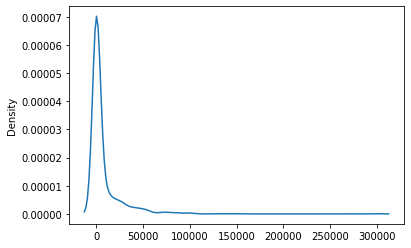

/home/muzammil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


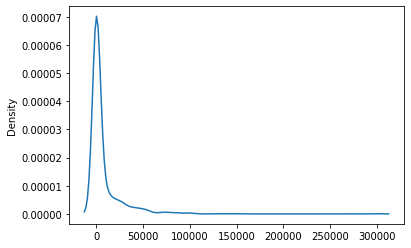

/home/muzammil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


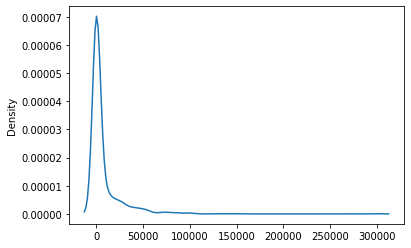

/home/muzammil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


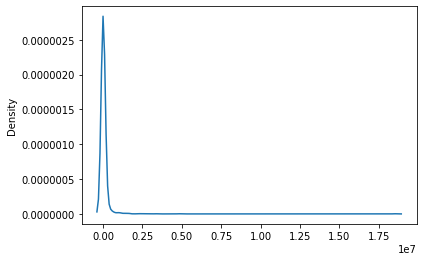

/home/muzammil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


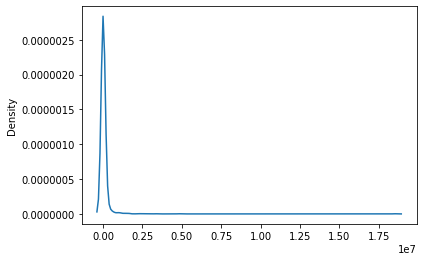

/home/muzammil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


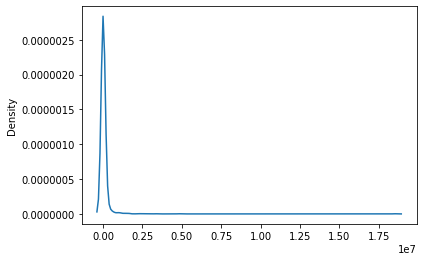

/home/muzammil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


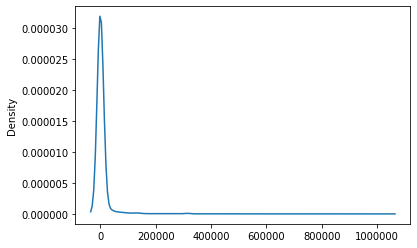

/home/muzammil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


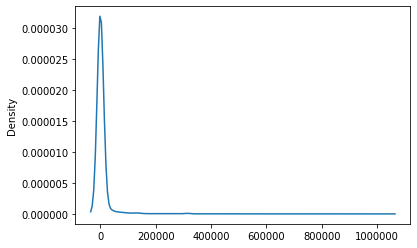

/home/muzammil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


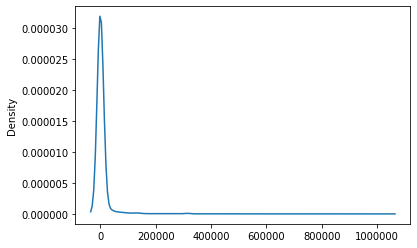

/home/muzammil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


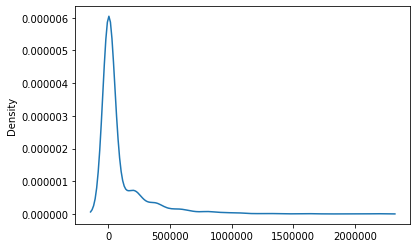

/home/muzammil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


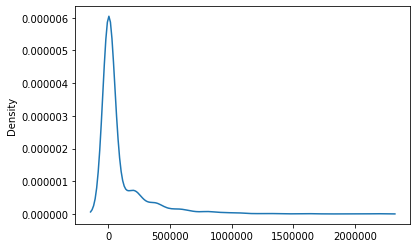

/home/muzammil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


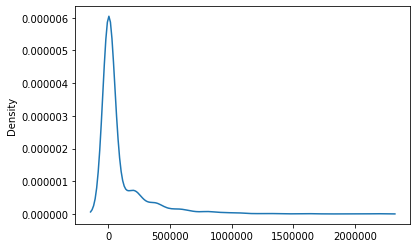

/home/muzammil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


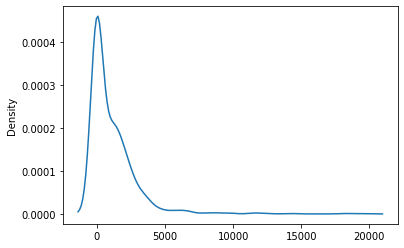

/home/muzammil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


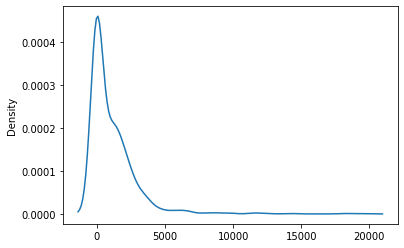

/home/muzammil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


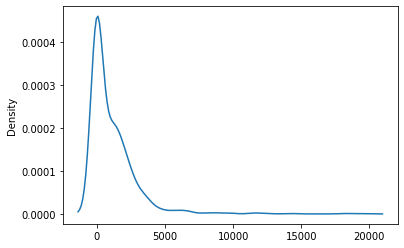

/home/muzammil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


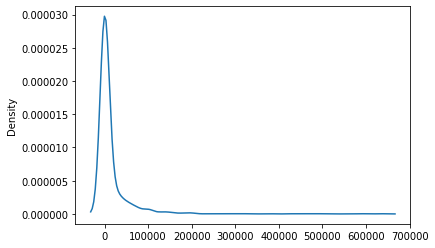

/home/muzammil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


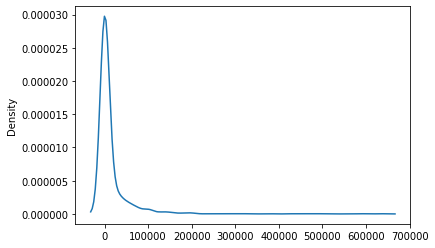

/home/muzammil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


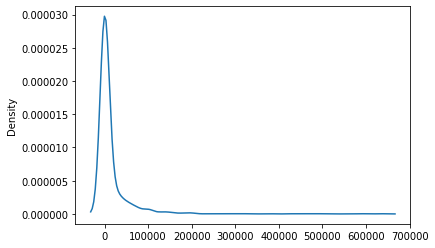

/home/muzammil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


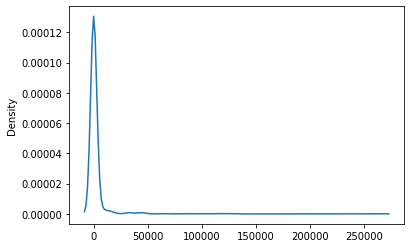

/home/muzammil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


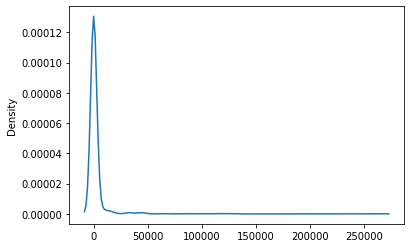

/home/muzammil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


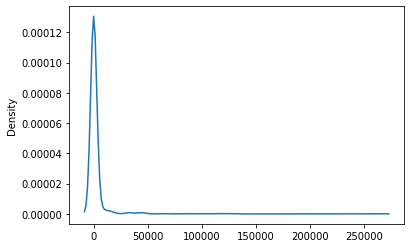

/home/muzammil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


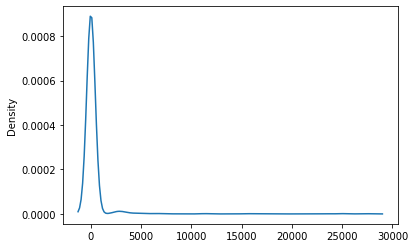

/home/muzammil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


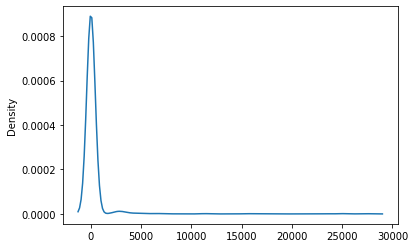

/home/muzammil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


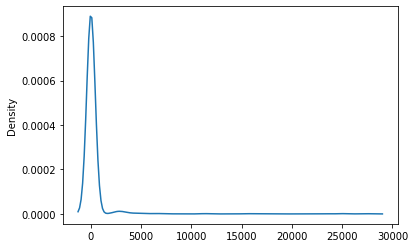

/home/muzammil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


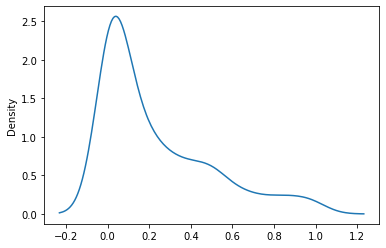

/home/muzammil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


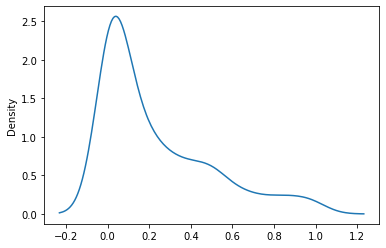

/home/muzammil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


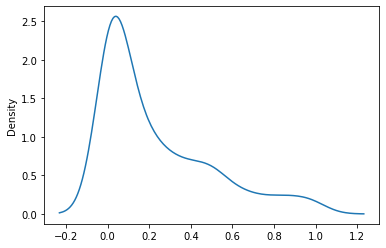

/home/muzammil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


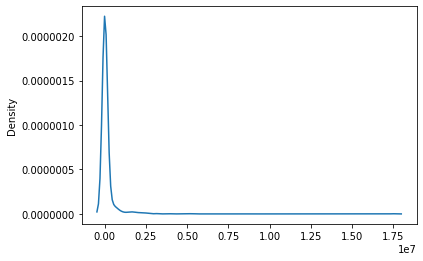

/home/muzammil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


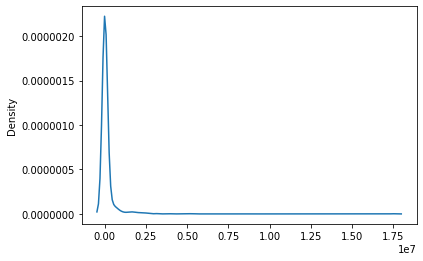

/home/muzammil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


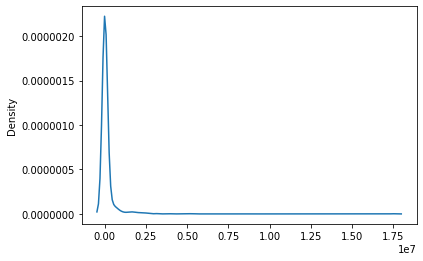

In [165]:
dictionary = getMetric(requiredAudits)
distplots(dictionary)

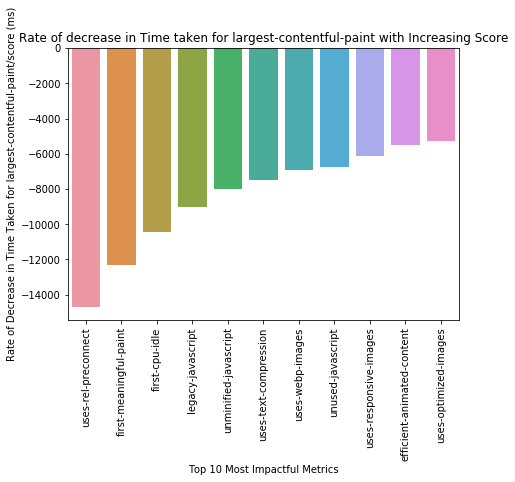

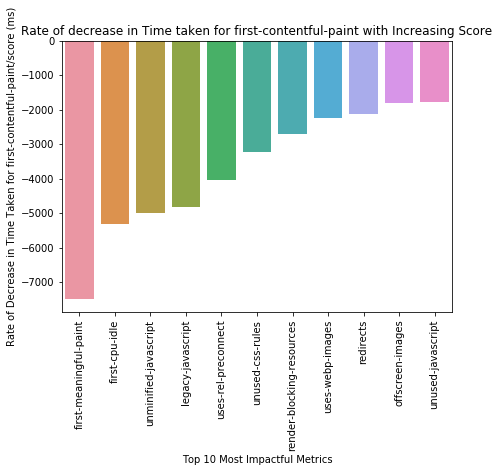

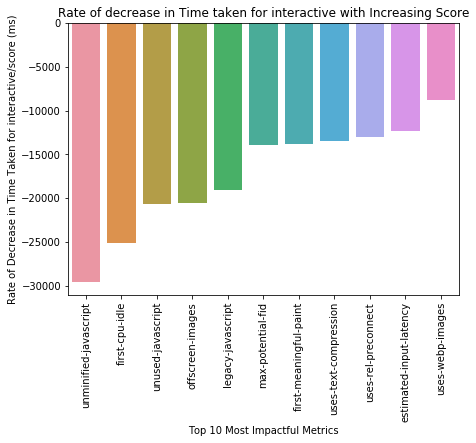

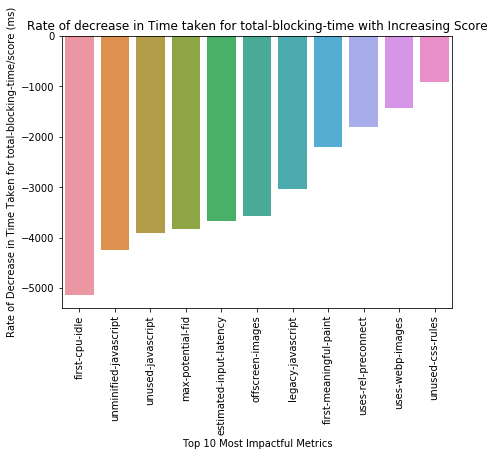

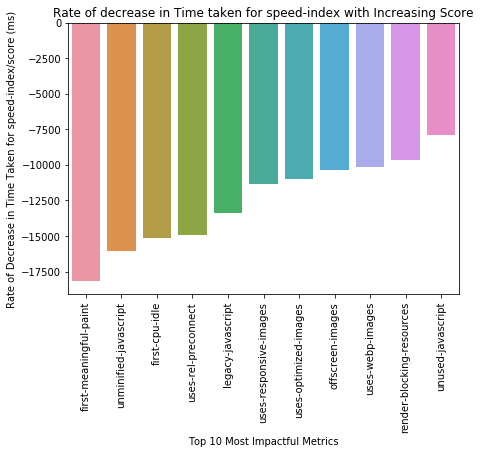

In [118]:
for performanceMetric, innerMetrics in performanceMetricsDict.items():
    keys = list(innerMetrics.keys())
    vals = [float(innerMetrics[k]) for k in keys]
    plt.figure(figsize=(7,5))
    plt.xticks(rotation=90)
    ax = sns.barplot(x=keys, y=vals)
    ax.set(title=f'Rate of decrease in Time taken for {performanceMetric} with Increasing Score', ylabel=f"Rate of Decrease in Time Taken for {performanceMetric}/score (ms)", xlabel='Top 10 Most Impactful Metrics')
    plt.show()